In [27]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [28]:
train_data=pd.read_csv('../train_data.csv')
x_train=train_data.drop('label',axis=1).values
y_train=train_data['label'].values

In [29]:
test_data=pd.read_csv('../test_data.csv')
x_test=test_data.drop('label',axis=1).values
y_test=test_data['label'].values

In [30]:


x_train=x_train.reshape((-1,32*32*3))
x_test=x_test.reshape((-1,32*32*3))

x_train=x_train/255.0
x_test=x_test/255.0


In [31]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [32]:
model =Sequential()
model.add(Dense(128, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               393344    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
sgd=SGD(0.01)
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 2.0293 - accuracy: 0.2678 - val_loss: 1.9455 - val_accuracy: 0.2939
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8468 - accuracy: 0.3473 - val_loss: 1.7952 - val_accuracy: 0.3683
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7734 - accuracy: 0.3741 - val_loss: 1.7504 - val_accuracy: 0.3745
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.7250 - accuracy: 0.3923 - val_loss: 1.7098 - val_accuracy: 0.3960
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6838 - accuracy: 0.4070 - val_loss: 1.6551 - val_accuracy: 0.4112
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6514 - accuracy: 0.4182 - val_loss: 1.6319 - val_accuracy: 0.4234
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6252 - accuracy: 0.4272 - val_loss: 1.6302 - val_accuracy: 0.4223
Epoch 

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 2ms/step
Actual :  ship
Predicted :  ship


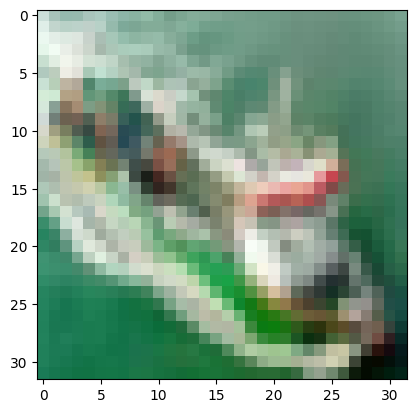

In [42]:
import random
n=15
plt.imshow(x_test[n].reshape(32,32,3), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual : ",class_names[np.argmax(y_test[n])])
print("Predicted : ", class_names[np.argmax(predicted_value[n])])

In [43]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4460 - accuracy: 0.4892


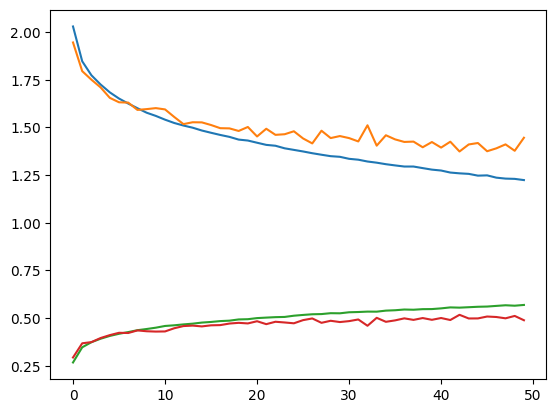

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])